In [12]:
SEED=185

In [13]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

import graphviz

In [14]:
DATA='data/mamografias.csv'

# Función para leer los datos
def readData(data_file):
    return pd.read_csv(data_file,sep=',', na_values='?')

data = readData(DATA) # Lectura de los datos

data.rename(columns = {'BI-RADS':'BiRads'}, inplace = True) # Para poder referirnos a esta columna como data.BiRads
data.BiRads.replace(0,pd.NA,inplace=True) # BiRads 0 significa radiografía insuficiente
data.Shape.replace('N',pd.NA,inplace=True) # Lo mismo pasa con Shape N
data.replace(pd.NA, np.nan, inplace=True)

data=data.dropna() # Eliminamos las instancias con valores perdidos
data.shape[0] # Nos quedamos con 825 instancias

# La distribución de la característica densidad es prácticamente degenerada en 3
data.drop('Density', axis='columns',inplace=True)
data.BiRads=data.BiRads.replace(6,5).replace(2,4).replace(3,4)

# Sklearn necesita datos numéricos (aunque sean nominales)
le = preprocessing.LabelEncoder()
data.Shape = le.fit_transform(data.Shape)
data.Severity = le.fit_transform(data.Severity)

dataArray=np.array(data)

# Separamos en datos y target (label)
x=dataArray[:,:-1]
y=dataArray[:,-1]

# Binarización de los atributos nominales
x_nom=x[:,2:4] # Columnas con variables nominales: Shape y Margin
x=np.delete(x,[2,3],axis=1) # Elimino las columnas
onehot = preprocessing.OneHotEncoder(sparse=False)
x_nom = onehot.fit_transform(x_nom)
x=np.hstack((x,x_nom))
# Para los árboles no reescalo los atributos porque no tiene efecto

In [15]:
features=['BI-RADS', 'Age', 'Shape=I', 'Shape=L', 'Shape=O', 'Shape=R', 'Margin=1', 'Margin=2','Margin=3', 'Margin=4', 'Margin=5']

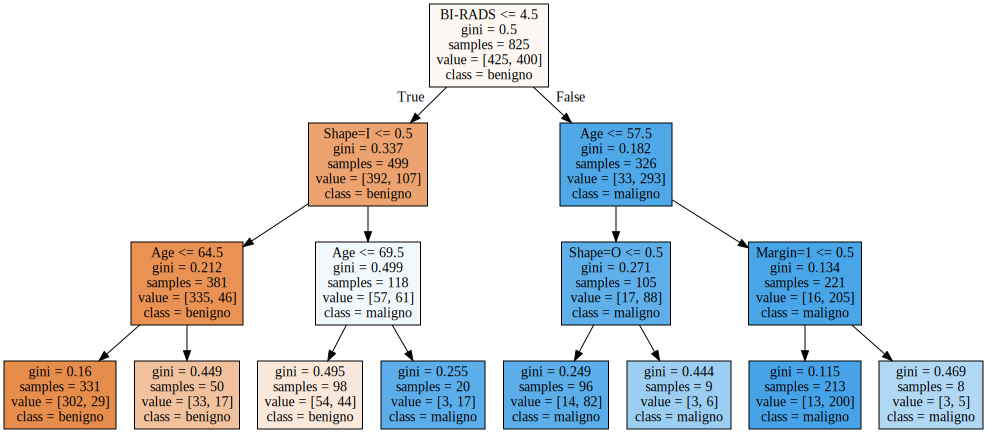

In [26]:
# Visualizar árbol de decisión
dt=tree.DecisionTreeClassifier(max_depth=3, random_state=SEED)
dt.fit(x,y)

# DOT data
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=features,  
                                class_names=['benigno', 'maligno'],
                                filled=True)

# Save and draw graph
graph = graphviz.Source(dot_data,format="png")
graph.render(filename='figures/tree')
graph

In [27]:
rf=RandomForestClassifier(n_estimators=1000, random_state=SEED)
rf.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=185,
                       verbose=0, warm_start=False)

In [47]:
# Características más útiles para Random Forest
# https://blog.datadive.net/selecting-good-features-part-iii-random-forests/

sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), features), 
             reverse=True)

[(0.3615, 'Age'),
 (0.2813, 'BI-RADS'),
 (0.1378, 'Margin=1'),
 (0.1027, 'Shape=I'),
 (0.03, 'Shape=O'),
 (0.0242, 'Shape=R'),
 (0.0192, 'Margin=4'),
 (0.0168, 'Margin=5'),
 (0.0114, 'Shape=L'),
 (0.0098, 'Margin=3'),
 (0.0055, 'Margin=2')]

In [48]:
list(zip(map(lambda x: round(x, 4), rf.feature_importances_),features))

[(0.2813, 'BI-RADS'),
 (0.3615, 'Age'),
 (0.1027, 'Shape=I'),
 (0.0114, 'Shape=L'),
 (0.03, 'Shape=O'),
 (0.0242, 'Shape=R'),
 (0.1378, 'Margin=1'),
 (0.0055, 'Margin=2'),
 (0.0098, 'Margin=3'),
 (0.0192, 'Margin=4'),
 (0.0168, 'Margin=5')]

In [49]:
round(sum(rf.feature_importances_[2:6]),4) # Importancia total de Shape

0.1682

In [50]:
round(sum(rf.feature_importances_[6:]),4) # Importancia total de Margin

0.189

In [57]:
# ¿Y si no hubiesemos eliminado Density?
data = readData(DATA) # Lectura de los datos

data.rename(columns = {'BI-RADS':'BiRads'}, inplace = True) # Para poder referirnos a esta columna como data.BiRads
data.BiRads.replace(0,pd.NA,inplace=True) # BiRads 0 significa radiografía insuficiente
data.Shape.replace('N',pd.NA,inplace=True) # Lo mismo pasa con Shape N
data.replace(pd.NA, np.nan, inplace=True)

data=data.dropna() # Eliminamos las instancias con valores perdidos
data.shape[0] # Nos quedamos con 825 instancias

# Sklearn necesita datos numéricos (aunque sean nominales)
le = preprocessing.LabelEncoder()
data.Shape = le.fit_transform(data.Shape)
data.Severity = le.fit_transform(data.Severity)

dataArray=np.array(data)

# Separamos en datos y target (label)
x=dataArray[:,:-1]
y=dataArray[:,-1]

rf.fit(x,y)

features=['BI-RADS', 'Age', 'Shape', 'Margin', 'Density']

sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), features), reverse=True)

[(0.3266, 'BI-RADS'),
 (0.311, 'Age'),
 (0.1788, 'Margin'),
 (0.1563, 'Shape'),
 (0.0273, 'Density')]

In [56]:
# ¿Nos equivocamos simplificando BI-RADS?
data = readData(DATA) # Lectura de los datos

data.rename(columns = {'BI-RADS':'BiRads'}, inplace = True) # Para poder referirnos a esta columna como data.BiRads
data.BiRads.replace(0,pd.NA,inplace=True) # BiRads 0 significa radiografía insuficiente
data.Shape.replace('N',pd.NA,inplace=True) # Lo mismo pasa con Shape N
data.replace(pd.NA, np.nan, inplace=True)

data=data.dropna() # Eliminamos las instancias con valores perdidos
data.shape[0] # Nos quedamos con 825 instancias

data.BiRads=data.BiRads.replace(6,5).replace(2,4).replace(3,4)

# Sklearn necesita datos numéricos (aunque sean nominales)
le = preprocessing.LabelEncoder()
data.Shape = le.fit_transform(data.Shape)
data.Severity = le.fit_transform(data.Severity)

dataArray=np.array(data)

# Separamos en datos y target (label)
x=dataArray[:,:-1]
y=dataArray[:,-1]

rf.fit(x,y)

features=['BI-RADS', 'Age', 'Shape', 'Margin', 'Density']

sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), features), reverse=True)

[(0.3219, 'Age'),
 (0.3153, 'BI-RADS'),
 (0.1798, 'Margin'),
 (0.1558, 'Shape'),
 (0.0272, 'Density')]